In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go

import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import numpy as np
from IPython.display import clear_output
import time
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [2]:
# Obtain the API credentials from an external hidden file

from passwords import api_key

In [3]:
# A function to obtain price history

#Utilizing "UniBit API" by Vincent Jiang
#Site: https://unibit.ai/product

def retrieve_ticker_price_info(ticker, start_date, end_date = False):
    
    # Obtain today's date
    today = date.today()
    
    # A condition to set the end date to today if there is no end date given
    if not end_date:
        end_date = today
    
    
    url = 'https://api.unibit.ai/v2/stock/historical/?tickers={}&interval=1&startDate={}&endDate={}&selectedFields=all&dataType=json&accessKey={}'.format(ticker, start_date, end_date, api_key)
    
    response = requests.get(url)
    return response.json()   

In [4]:
def retrieve_price_history_dataframe(ticker, ticker_price_history):
    
    data_frame = pd.DataFrame(ticker_price_history['result_data'][ticker])
    
    # Set the index to the 'date' column
    data_frame.set_index('date', inplace = True)
    
    data_frame.sort_index(inplace=True)
    
    return data_frame

In [5]:
today = date.today()
a_year_ago = str(date.today() - timedelta(days=1*365))

In [6]:
# A test of the above functions with the 'DKS' company ticker

# Obtain the price info
dks_info = retrieve_ticker_price_info('DKS', a_year_ago)

# Create and view the dataframe
dks_df = retrieve_price_history_dataframe('DKS', dks_info)
dks_df.head()

,adj_close,close,high,low,open,volume
date,,,,,,
2019-01-14,33.2222,33.75,34.49,33.00,33.32,1902300
2019-01-15,33.0549,33.58,34.22,33.51,33.87,1435600
2019-01-16,32.4741,32.99,33.73,32.64,33.44,1196200
2019-01-17,32.8088,33.33,33.50,32.40,32.62,1341800
2019-01-18,33.7144,34.25,34.45,33.46,33.89,1450000


In [7]:
dks_info['meta_data']['start_date']
dks_info['meta_data']['end_date']
list(dks_info['result_data'].keys())[0]

'DKS'

In [8]:
def print_ohlc(ticker_df, ticker_info):
    
    ticker_n = list(ticker_info['result_data'].keys())[0]
    start_date = ticker_info['meta_data']['start_date']
    end_date = ticker_info['meta_data']['end_date']

    
    
    fig = go.Figure(data=go.Ohlc(x=ticker_df.index,
                    open=ticker_df['open'],
                    high=ticker_df['high'],
                    low=ticker_df['low'],
                    close=ticker_df['close']))

    fig.update_layout(title_text='{} From {} to {}'.format(ticker_n, start_date, end_date),
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, xaxis_title="Time", yaxis_title="Price")
    
    fig.show()

In [9]:
print_ohlc(dks_df, dks_info)

# Obtain S&P 500 Index Values and Create Transformations

In [10]:
# The S&P 500 company ticker is ^GSPC

# Obtain the price info
inx_info = retrieve_ticker_price_info('^GSPC', a_year_ago)

# Create and view the dataframe
inx_df = retrieve_price_history_dataframe('^GSPC', inx_info)
inx_df.head()

,adj_close,close,high,low,open,volume
date,,,,,,
2019-01-14,2582.61,2582.61,2589.32,2570.41,2580.31,3664450000
2019-01-15,2610.30,2610.30,2613.08,2585.10,2585.10,3572330000
2019-01-16,2616.10,2616.10,2625.76,2612.68,2614.75,3863770000
2019-01-17,2635.96,2635.96,2645.06,2606.36,2609.28,3772270000
2019-01-18,2670.71,2670.71,2675.47,2647.58,2651.27,3986730000


In [11]:
# View the S&P 500
print_ohlc(inx_df, inx_info)

In [12]:
inx_df.head()

,adj_close,close,high,low,open,volume
date,,,,,,
2019-01-14,2582.61,2582.61,2589.32,2570.41,2580.31,3664450000
2019-01-15,2610.30,2610.30,2613.08,2585.10,2585.10,3572330000
2019-01-16,2616.10,2616.10,2625.76,2612.68,2614.75,3863770000
2019-01-17,2635.96,2635.96,2645.06,2606.36,2609.28,3772270000
2019-01-18,2670.71,2670.71,2675.47,2647.58,2651.27,3986730000


In [13]:
# Create transformation columns of the adjusted close price

# Source: https://docs.scipy.org/doc/numpy/reference/routines.math.html

# Calculate the log of the adjusted close prices
inx_df['adj_close_log'] = np.log(inx_df['adj_close'])

# Calculate the square root of the adjusted close prices
inx_df['adj_close_sqrt'] = np.sqrt(inx_df['adj_close'])

# Calculate the cubed root of the adjusted close prices
inx_df['adj_close_cbrt'] = np.cbrt(inx_df['adj_close'])



In [14]:
inx_df.head()

,adj_close,close,high,low,open,volume,adj_close_log,adj_close_sqrt,adj_close_cbrt
date,,,,,,,,,
2019-01-14,2582.61,2582.61,2589.32,2570.41,2580.31,3664450000,7.856556,50.819386,13.719963
2019-01-15,2610.30,2610.30,2613.08,2585.10,2585.10,3572330000,7.867220,51.091095,13.768823
2019-01-16,2616.10,2616.10,2625.76,2612.68,2614.75,3863770000,7.869440,51.147825,13.779013
2019-01-17,2635.96,2635.96,2645.06,2606.36,2609.28,3772270000,7.877003,51.341601,13.813793
2019-01-18,2670.71,2670.71,2675.47,2647.58,2651.27,3986730000,7.890100,51.678913,13.874231


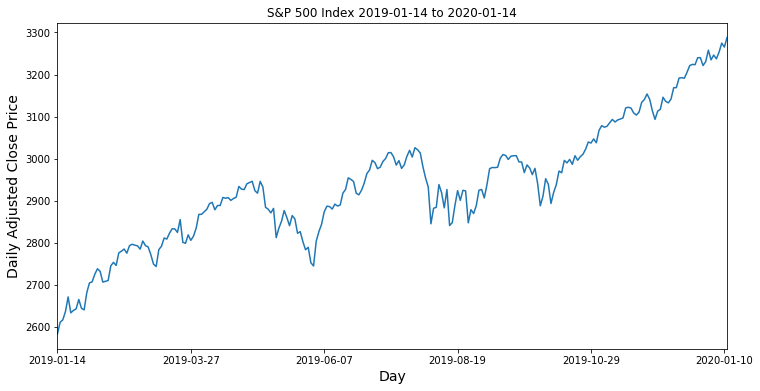

In [15]:
# Original Plot

inx_df['adj_close'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("Daily Adjusted Close Price", fontsize=14)
plt.title('S&P 500 Index {} to {}'.format(a_year_ago, today))
plt.show()

# Removing Trends

## 1) Transformations

### A) Log Transformation

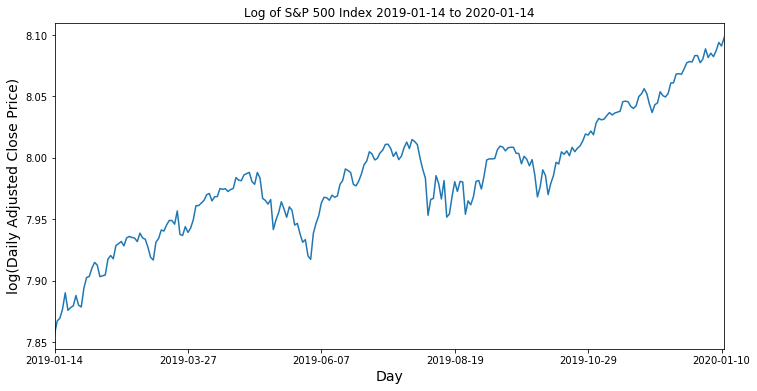

In [16]:
inx_df['adj_close_log'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("log(Daily Adjusted Close Price)", fontsize=14)
plt.title('Log of S&P 500 Index {} to {}'.format(a_year_ago, today))
plt.show()

### B) Square Root Transformation

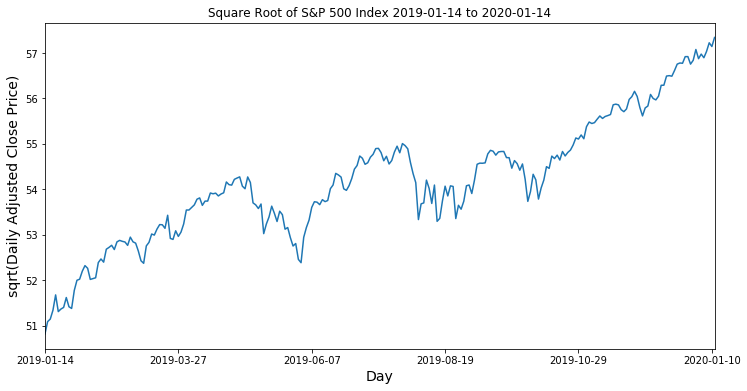

In [17]:
inx_df['adj_close_sqrt'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("sqrt(Daily Adjusted Close Price)", fontsize=14)
plt.title('Square Root of S&P 500 Index {} to {}'.format(a_year_ago, today))
plt.show()

### C) Cubed Root Transformation

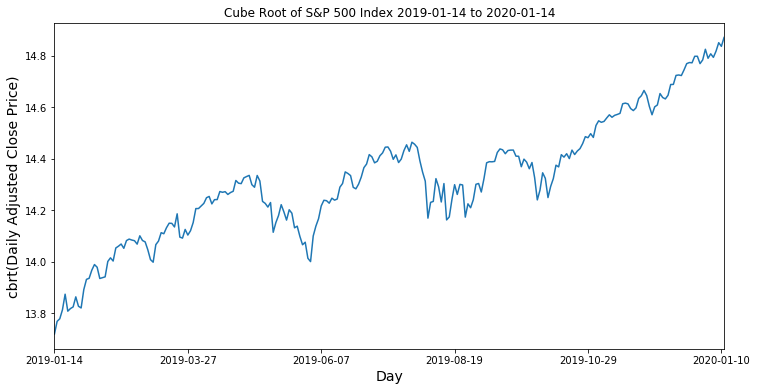

In [18]:
inx_df['adj_close_cbrt'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("cbrt(Daily Adjusted Close Price)", fontsize=14)
plt.title('Cube Root of S&P 500 Index {} to {}'.format(a_year_ago, today))
plt.show()

## 2) Rolling Mean

NOTE: The lab removes the rolling mean after a transformation.

### A) Subtract the Rolling Mean

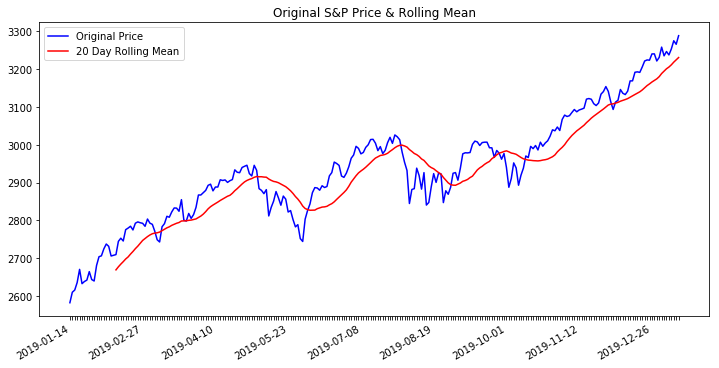

In [19]:
rolmean = inx_df['adj_close'].rolling(window = 20).mean()


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(inx_df['adj_close'], color='blue',label='Original Price')
ax.plot(rolmean, color='red',label='20 Day Rolling Mean')

fig.autofmt_xdate()
ax.legend(loc='best')
plt.title('Original S&P Price & Rolling Mean')


#set cusom format of dates
ticklabels = inx_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#show only each 30th label, another are not visible
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


plt.show(block=False)

In [20]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = inx_df['adj_close'] - rolmean
data_minus_rolmean[15:25]

date
2019-02-05        NaN
2019-02-06        NaN
2019-02-07        NaN
2019-02-08        NaN
2019-02-11    40.4095
2019-02-12    67.2335
2019-02-13    68.3970
2019-02-14    54.6155
2019-02-15    77.5035
2019-02-19    76.2110
Name: adj_close, dtype: float64

In [21]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

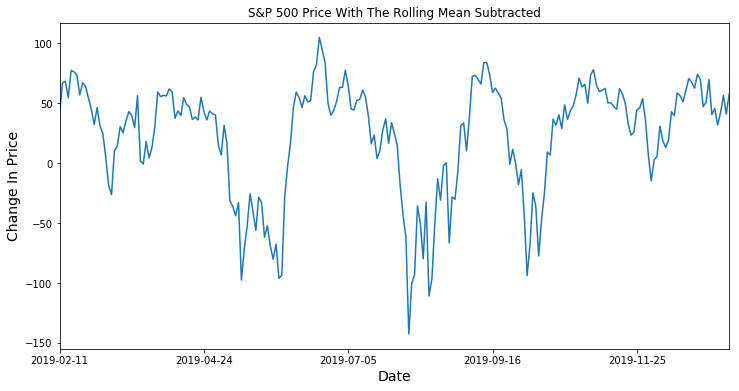

In [22]:
data_minus_rolmean.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('S&P 500 Price With The Rolling Mean Subtracted')
plt.show()

### B) Weighted Rolling Mean

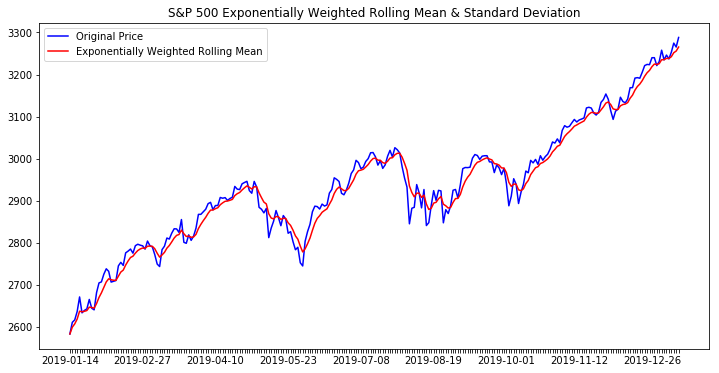

In [23]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = inx_df['adj_close'].ewm(halflife = 2).mean()

# Plot the original data with exp weighted average
fig, ax = plt.subplots(figsize=(12,6))
orig = plt.plot(inx_df['adj_close'], color='blue',label='Original Price')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')

plt.legend(loc='best')
plt.title('S&P 500 Exponentially Weighted Rolling Mean & Standard Deviation')

#set cusom format of dates
ticklabels = inx_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#show only each 30th label, another are not visible
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


plt.show(block=False)

In [24]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = inx_df['adj_close'] - exp_rolmean
data_minus_exp_rolmean.head(15)

date
2019-01-14     0.000000
2019-01-15    11.469574
2019-01-16     9.445043
2019-01-17    17.860712
2019-01-18    33.892436
2019-01-22    -2.606218
2019-01-23     2.167647
2019-01-24     3.986349
2019-01-25    18.321431
2019-01-28    -1.805937
2019-01-29    -3.961919
2019-01-30    26.052808
2019-01-31    34.560254
2019-02-01    26.070751
2019-02-04    31.330886
Name: adj_close, dtype: float64

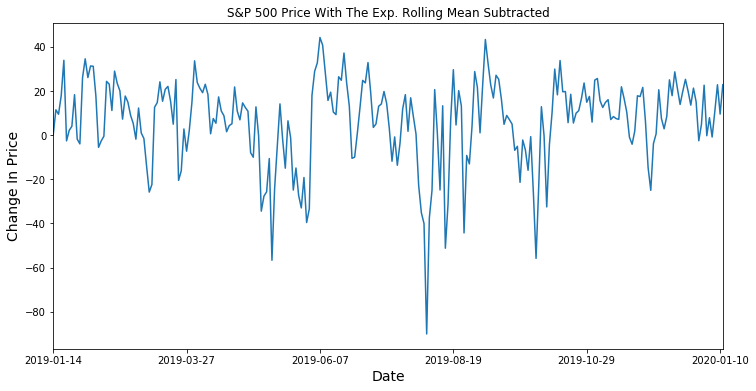

In [25]:
data_minus_exp_rolmean.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('S&P 500 Price With The Exp. Rolling Mean Subtracted')
plt.show()

## 3) Differencing

In [26]:
data_diff = inx_df['adj_close'].diff(periods=1)
data_diff.head(10)

date
2019-01-14      NaN
2019-01-15    27.69
2019-01-16     5.80
2019-01-17    19.86
2019-01-18    34.75
2019-01-22   -37.81
2019-01-23     5.80
2019-01-24     3.63
2019-01-25    22.43
2019-01-28   -20.91
Name: adj_close, dtype: float64

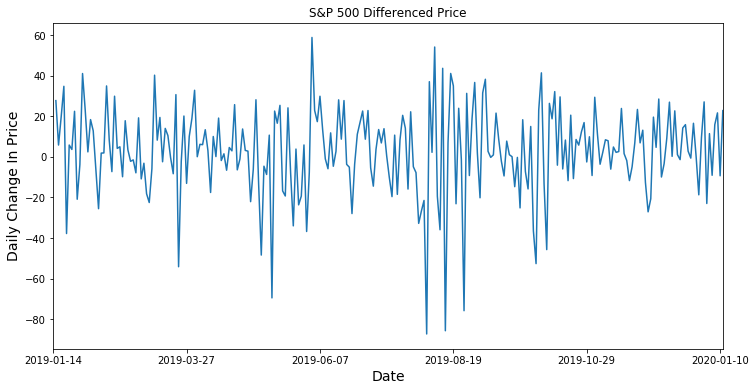

In [27]:
data_diff.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Change In Price", fontsize=14)
plt.title('S&P 500 Differenced Price')
plt.show(block=False)

## 4) Time Series Decomposition

In [29]:
from statsmodels.tsa.seasonal import seasonal_decomposeb

In [53]:
# Convert date index to datetime object
inx_df.index = pd.to_datetime(inx_df.index)

In [79]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

print(pd.DatetimeIndex(inx_df['adj_close'], periods = 1).inferred_freq)

None


In [66]:
inx_df['adj_close'].inferred_freq()

AttributeError: 'Series' object has no attribute 'inferred_freq'

In [75]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], freq = 20)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

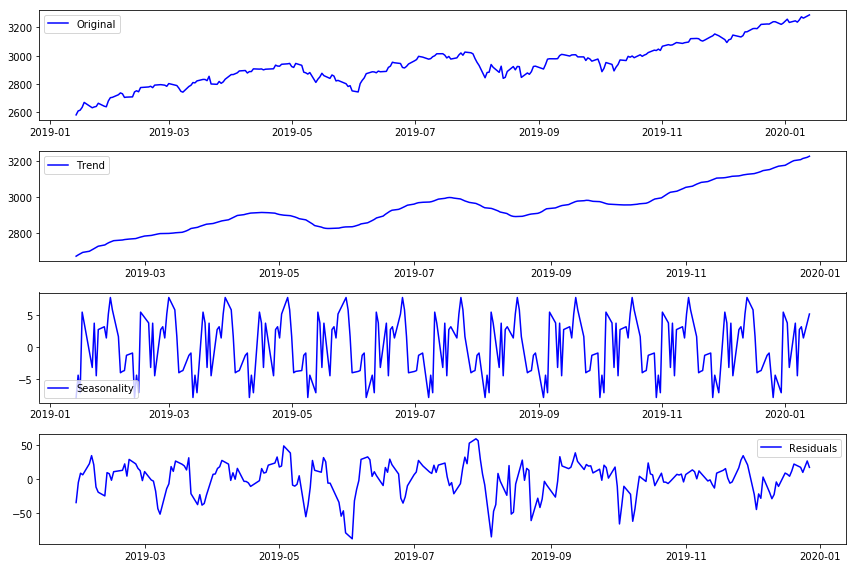

In [76]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()